# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We are going to use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student name: Tobia Peruzzi
    
ID: 1185463

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1185463
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


In [7]:
print(type(X))

<class 'numpy.ndarray'>


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [62 46 47 50 51 49 61 40 50 44]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


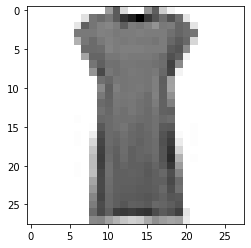

LABEL: 3
INPUT:


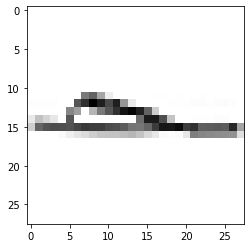

LABEL: 5
INPUT:


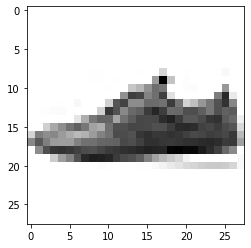

LABEL: 7
INPUT:


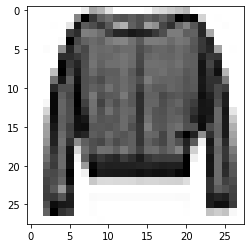

LABEL: 2


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,5000)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [11]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.0005, 0.005, 0.05, 0.5, 5, 50, 500]}

#run linear SVM
from sklearn import svm

lin_svm = svm.SVC(C=parameters['C'], kernel='linear', gamma='auto')
svm_fit = GridSearchCV(lin_svm, parameters, cv=4, return_train_score=True, iid=False)
svm_fit.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found: ", svm_fit.best_params_)

print(svm_fit.best_params_['C'])

print("Score with best parameters: ", svm_fit.best_score_)

print("All scores on the grid:", svm_fit.cv_results_['mean_test_score'])



RESULTS FOR LINEAR KERNEL
Best parameters set found:  {'C': 0.5}
0.5
Score with best parameters:  0.7573899987010935
All scores on the grid: [0.23376036 0.70380434 0.7431896  0.75739    0.75739    0.75739
 0.75739   ]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

pol2_svm = svm.SVC(C=parameters['C'], kernel='poly', degree=2, gamma=parameters['gamma'])
svm_fit = GridSearchCV(pol2_svm, parameters, cv=4, return_train_score=True, iid=False)
svm_fit.fit(X_train, y_train) 

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found: ", svm_fit.best_params_)

print("Score with best parameters: ", svm_fit.best_score_)

print("All scores on the grid:", svm_fit.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:  {'C': 0.5, 'gamma': 0.05}
Score with best parameters:  0.7331519582832156
All scores on the grid: [0.7217159  0.73121397 0.73121397 0.73315196 0.73121397 0.73121397
 0.73121397 0.73121397 0.73121397]


## TO DO 3

Now let's try a higher degree for the polynomial kernel.

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 3 kernel

pol3_svm = svm.SVC(C=parameters['C'], kernel='poly', degree=3, gamma=parameters['gamma'])
svm_fit = GridSearchCV(pol3_svm, parameters, cv=4, return_train_score=True, iid=False)
svm_fit.fit(X_train, y_train) 

#ADD YOUR CODE 

print ('RESULTS FOR POLY DEGREE=3 KERNEL')

print("Best parameters set found: ", svm_fit.best_params_)

print("Score with best parameters: ", svm_fit.best_score_)

print("All scores on the grid:", svm_fit.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE=3 KERNEL
Best parameters set found:  {'C': 0.05, 'gamma': 0.05}
Score with best parameters:  0.7093560775698498
All scores on the grid: [0.70935608 0.68156235 0.68156235 0.6892137  0.68156235 0.68156235
 0.68963159 0.68156235 0.68156235]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

rbf_svm = svm.SVC(C=parameters['C'], kernel='rbf', gamma=parameters['gamma'])
svm_fit = GridSearchCV(rbf_svm, parameters, cv=4, return_train_score=True, iid=False)
svm_fit.fit(X_train, y_train) 

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found: ", svm_fit.best_params_)

print("Score with best parameters: ", svm_fit.best_score_)

print("All scores on the grid:", svm_fit.cv_results_['mean_test_score'])

RESULTS FOR rbf KERNEL
Best parameters set found:  {'C': 5, 'gamma': 0.005}
Score with best parameters:  0.7717519240566562
All scores on the grid: [0.69185616 0.65002673 0.12595186 0.12398336 0.77175192 0.73637086
 0.13796108 0.12595186 0.77168473 0.73637086 0.13796108 0.12595186
 0.77168473 0.73637086 0.13796108 0.12595186]


## TO DO5
What do you observe when using RBF and polynomial kernels on this dataset ?

### ANSWER TO THE QUESTION

The main thing that I observe is that the score with best parameters changes a little between polynomial and rbf. Particularly the lowest score is related to the polynomial kernel with degree 3, and the highest is related to the rbf kernel. Beside that there is also a change in the best parameters set between rbf and polynomial kernels.

## TO DO 6
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = svm.SVC(C=0.05, kernel='poly', degree=3, gamma=0.05) 

best_SVM.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.050000
Best SVM test error: 0.259025


## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [174 207 199 195 191 211 197 228 202 196]


Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO 9 cell below.

### TO DO 7

In [14]:
#get training and test error for the best SVM model from CV

best_SVM = svm.SVC(C=0.05, kernel='poly', degree=3, gamma=0.05) 

best_SVM.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)


print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.033500
Best SVM test error: 0.202259


Just for comparison, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

### TO DO 8 Try first without regularization (use a very large large C)

In [15]:
from sklearn import linear_model

reg = linear_model.LogisticRegression(C=100000000, solver='newton-cg', penalty='l2', multi_class='auto')
reg.fit(X_train, y_train)

training_error = 1. - reg.score(X_train,y_train)
test_error = 1. - reg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.213948


### TO DO 9 Then use also some regularization 

In [16]:
reg = linear_model.LogisticRegression(solver='newton-cg', penalty='l2', multi_class='auto')
reg.fit(X_train, y_train)

training_error = 1. - reg.score(X_train,y_train)
test_error = 1. - reg.score(X_test,y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.011500
Best regularized logistic regression test error: 0.186966


## TO DO 10
Compare and discuss:
- the results from SVM with m=500 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression with and without regularization

### ANSWER TO THE QUESTION

The SVM results (training and test errors) are better with m=2000 training data points.
I cannot evaluate the training error, because for the logistic regression without regularization for me it is 0. But the test error for logistic regression is better with regularization. Furthermore the two errors are better for logistic regression with regularization than for SVM.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [26]:
LR_prediction = reg.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

Logistic regression prediction: 

INPUT:


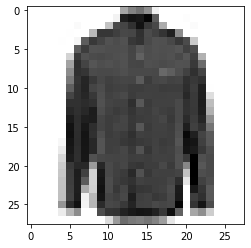

LABEL: 4
SVM prediction: 

INPUT:


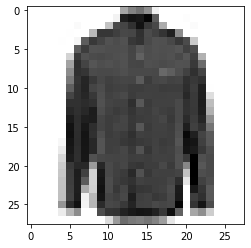

LABEL: 6


In [27]:
print('Logistic regression prediction: \n')
plot_input(X_test,LR_prediction,50)
print('SVM prediction: \n')
plot_input(X_test,SVM_prediction,50)

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [29]:
from sklearn.metrics import confusion_matrix

# for better aligned printing of confusion matrix use floatmode='fixed' (not supported in all versions of Python)
np.set_printoptions(precision=2, suppress=True) 

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_train, svm_fit.predict(X_train))
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = confusion_matrix(y_train, reg.predict(X_train))
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5826 5793 5801 5805 5809 5789 5803 5772 5798 5804]

 Confusion matrix SVM  
 
 [[162   0   1   5   0   0   5   0   1   0]
 [  1 200   2   4   0   0   0   0   0   0]
 [  3   0 171   1  15   0   7   0   2   0]
 [  4   0   2 185   1   0   3   0   0   0]
 [  0   0   9   7 170   0   5   0   0   0]
 [  0   0   0   0   0 205   0   6   0   0]
 [ 26   0  16   6  11   0 137   0   1   0]
 [  0   0   0   0   0   3   0 218   1   6]
 [  2   0   0   0   0   0   0   1 198   1]
 [  0   0   0   0   0   0   0   6   0 190]]

 Confusion matrix SVM (normalized)   
 
 [[0.03 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.03 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.03 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.03 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.03 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.04 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.02 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.

## TO DO 12
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

### ANSWER TO THE QUESTION
Maybe the value of accuracies is due to the size of each class.